In [38]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [1]:
bolded_string = "\033[1m" + Assignment4 + "\033[0m"

# Learning curves has an important role in developing any machine learning algorithm. To understand the effect of changing the hyper parameters and their effect on deep network that we designed, draw two learning curves for Accuracy of test vs. epochs (whereas number of epochs is 55). Repeat this analysis two times: 
#(1).With Adam algorithm
#(2).With SGD

In [2]:
# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [3]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

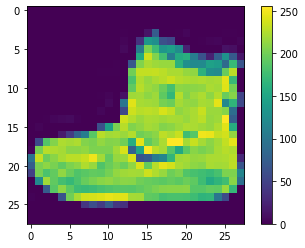

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

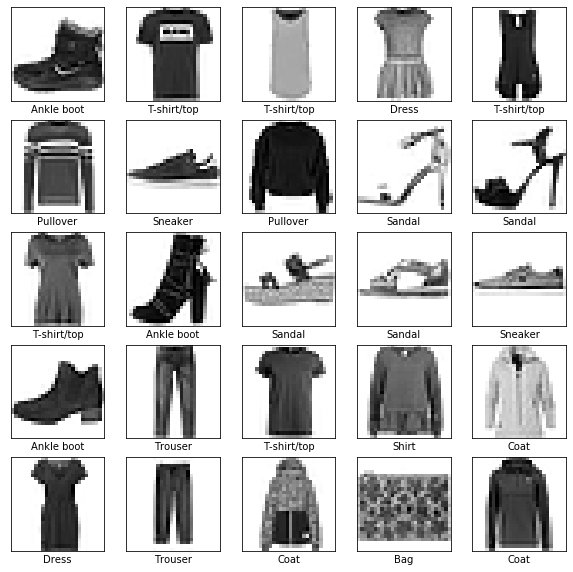

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


Y_test = test_labels 
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(train_labels )
y_test = np_utils.to_categorical(test_labels )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model():
    # create model
    model = Sequential()
    #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [25]:
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/55
48000/48000 [==============================] - 1s 29us/sample - loss: 1.8933 - accuracy: 0.3903 - val_loss: 1.3320 - val_accuracy: 0.6009
Epoch 2/55
48000/48000 [==============================] - 1s 23us/sample - loss: 1.0852 - accuracy: 0.6302 - val_loss: 0.9012 - val_accuracy: 0.6790
Epoch 3/55
48000/48000 [==============================] - 1s 26us/sample - loss: 0.8362 - accuracy: 0.6954 - val_loss: 0.7571 - val_accuracy: 0.7229
Epoch 4/55
48000/48000 [==============================] - 1s 24us/sample - loss: 0.7315 - accuracy: 0.7369 - val_loss: 0.6845 - val_accuracy: 0.7574
Epoch 5/55
48000/48000 [==============================] - 1s 27us/sample - loss: 0.6684 - accuracy: 0.7646 - val_loss: 0.6321 - val_accuracy: 0.7792
Epoch 6/55
48000/48000 [==============================] - 1s 22us/sample - loss: 0.6205 - accuracy: 0.7835 - val_loss: 0.5980 - val_accuracy: 0.7912
Epoch 7/55
48000/48000 [==============================] 

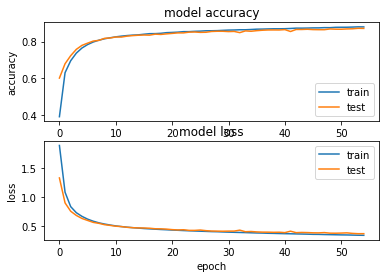

In [27]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [28]:
predictions = model.predict(X_test)
predictions[0]

array([6.4247957e-05, 1.0311298e-05, 2.0192383e-06, 8.8475890e-06,
       2.4730246e-06, 8.9726731e-02, 3.0003654e-05, 6.1077166e-02,
       4.5916890e-03, 8.4448653e-01], dtype=float32)

In [31]:
# With adam as optimizer

def baseline_model():
    # create model
    model = Sequential()
    #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/55
48000/48000 [==============================] - 1s 30us/sample - loss: 0.6215 - accuracy: 0.7865 - val_loss: 0.4553 - val_accuracy: 0.8398
Epoch 2/55
48000/48000 [==============================] - 1s 23us/sample - loss: 0.4154 - accuracy: 0.8528 - val_loss: 0.3984 - val_accuracy: 0.8589
Epoch 3/55
48000/48000 [==============================] - 1s 23us/sample - loss: 0.3682 - accuracy: 0.8670 - val_loss: 0.3678 - val_accuracy: 0.8683
Epoch 4/55
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3364 - accuracy: 0.8768 - val_loss: 0.3593 - val_accuracy: 0.8719
Epoch 5/55
48000/48000 [==============================] - 1s 23us/sample - loss: 0.3185 - accuracy: 0.8825 - val_loss: 0.3422 - val_accuracy: 0.8789
Epoch 6/55
48000/48000 [==============================] - 1s 23us/sample - loss: 0.3044 - accuracy: 0.8887 - val_loss: 0.3330 - val_accuracy: 0.8798
Epoch 7/55
48000/48000 [==============================] 

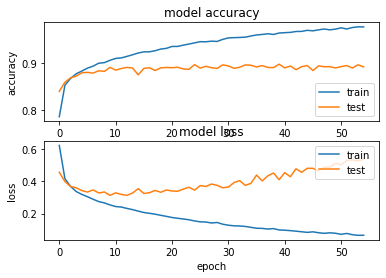

In [33]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions[0]

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#3fa293")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

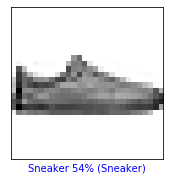

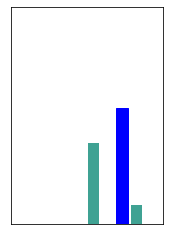

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()